In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DATAS/iris.csv')

In [3]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
len(df)

150

In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
X = df.iloc[:, 0:4].values

In [7]:
y = df.iloc[:, -1].values

In [8]:
from sklearn.preprocessing import LabelBinarizer

In [9]:
encoder = LabelBinarizer()

In [10]:
y = encoder.fit_transform(y)

In [11]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [19]:
X_train.shape

(120, 4)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [22]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(units=4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=3, activation='softmax'))

In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=300, callbacks=[early], validation_data=(X_test, y_test))

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5300 - loss: 1.0368 - val_accuracy: 0.6333 - val_loss: 1.0092
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5921 - loss: 1.0241 - val_accuracy: 0.6000 - val_loss: 1.0044
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5856 - loss: 1.0316 - val_accuracy: 0.5667 - val_loss: 0.9996
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6452 - loss: 1.0117 - val_accuracy: 0.5667 - val_loss: 0.9949
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5648 - loss: 1.0243 - val_accuracy: 0.5667 - val_loss: 0.9903
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5710 - loss: 1.0109 - val_accuracy: 0.5333 - val_loss: 0.9857
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5385 - loss: 1.0130 - val_accuracy: 0.5333 - val_loss: 0.9812
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5315 - loss: 1.0132 - val_accuracy: 0.5333 - val_loss:

In [25]:
history = pd.DataFrame(model.history.history)

<Axes: >

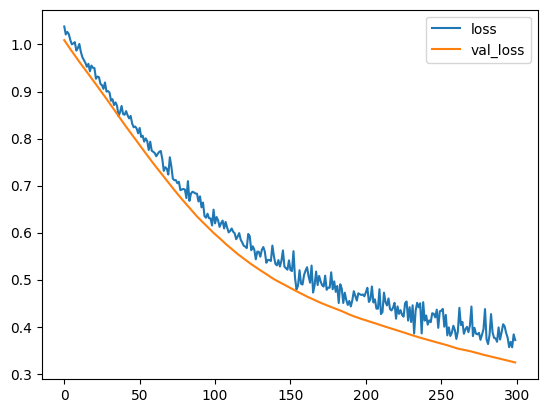

In [26]:
history[['loss', 'val_loss']].plot()

<Axes: >

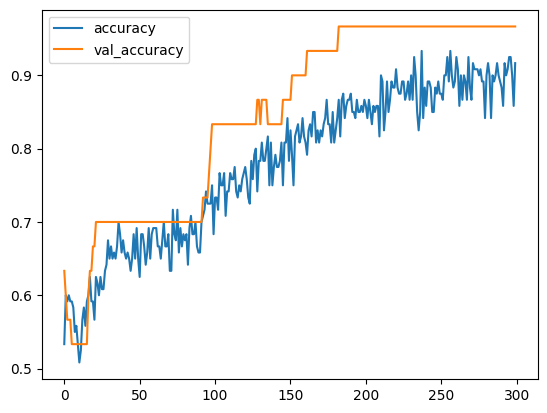

In [27]:
history[['accuracy', 'val_accuracy']].plot()

# Metrics

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [29]:
model.evaluate(X_test, y_test, verbose=0)

[0.3239254355430603, 0.9666666388511658]

In [30]:
pred = model.predict(X_test)  # Saída será um array de probabilidades

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [31]:
# arg_max aplicado para problema de multiclasse

In [32]:
# Converter para rótulos de classe (0, 1, 2) usando argmax
predictions = np.argmax(pred, axis=1)

In [33]:
# Como y_test está em one-hot encoding, convertemos de volta para rótulos de classe
y_test_classes = np.argmax(y_test, axis=1)

In [34]:
accuracy_score(y_test_classes, predictions)

0.9666666666666667

In [35]:
print(classification_report(y_test_classes, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [36]:
cm = confusion_matrix(y_test_classes, predictions)

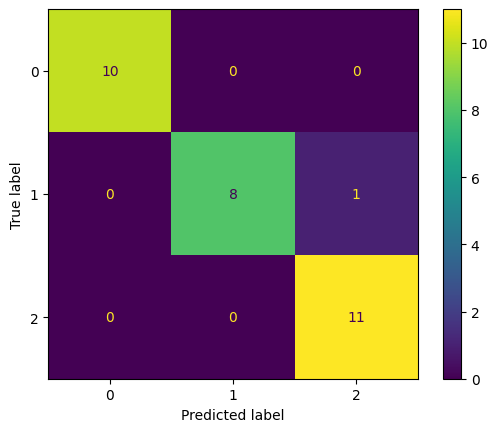

In [37]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

# Train all data

In [38]:
# Com um bom accuracy entedemos que a nossa base de dados está o suficiente para iniciar o treinmaneto com toda base de dados

In [39]:
epochs = len(history)

In [40]:
X_scaled = scaler.fit_transform(X)

In [41]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=3, activation='softmax'))

In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_scaled, y, epochs=300)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2728 - loss: 1.1105  
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4070 - loss: 1.1032 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3376 - loss: 1.1045 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3523 - loss: 1.1018 
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3454 - loss: 1.1024 
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2893 - loss: 1.1010 
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2680 - loss: 1.0996 
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2679 - loss: 1.0976 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3284 - loss: 1.0965 
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3728 - loss: 1.0945 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3481 - loss: 1.0936 
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3278 - lo

In [44]:
# save model
model.save("final_model_iris.keras")

In [45]:
# save scaler
import joblib
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [46]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# Tesntando o modelo salvo

In [47]:
from tensorflow.keras.models import load_model

In [57]:
model_iris = load_model('final_model_iris.keras')

In [59]:
iris_scaler = joblib.load('iris_scaler.pkl')

In [92]:
# 'setosa', 'versicolor', 'virginica'
def model_predict(flower):
    class_labels = np.array(["setosa", "versicolor", "virginica"])
    
    np_features = np.array([flower['sepal_length'], flower['sepal_width'], flower['petal_length'], flower['petal_width']])

    np_features_scaler = iris_scaler.transform([np_features])
    
    pred = model.predict(np_features_scaler, verbose=0)

    prediction = np.argmax(pred, axis=1)[0]
    
    return {'Prediction': class_labels[prediction], 'Confidence': float(np.max(pred)) }

In [61]:
X_train[0]

array([0.08823529, 0.66666667, 0.        , 0.04166667])

In [62]:
y_train[0]

array([1, 0, 0])

In [93]:
model_predict(flower_example)

{'Prediction': 'virginica', 'Confidence': 0.4917088449001312}

In [84]:
flower_example = {
    'sepal_length': X_scaled[145][0],
    'sepal_width': X_scaled[145][1],
    'petal_length': X_scaled[145][2],
    'petal_width': X_scaled[145][3]
}

In [64]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Code for deploy